# STEP 1- READING,UNDERSTANDING AND VISUALISATION OF DATA

In [762]:
#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [763]:
#Importing all the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [764]:
#Importing the dataset

df_bike= pd.read_csv('day.csv')

In [765]:
#Checking the dataset
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [766]:
#Checking the number of rows and columns of dataset
df_bike.shape

(730, 16)

In [767]:
#Checking the columns and null values if any
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [768]:
#Some statistical information of data

df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [769]:
# instant has the record index which is redundant,dteday has the date which is of no use as we have seperate columns for month and year
# casual and registered is the breakup of the cnt variable which is our target variable.

df_bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [770]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [771]:
#Renaming some columns for better readibility of data

df_bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [772]:
df_bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [773]:
#Changing the season variable into categorical categories

df_bike.season = df_bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [774]:
#Changing the weekday variable into the days of the week
df_bike.weekday = df_bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [775]:
df_bike.weathersit = df_bike.weathersit.map({1:'Clear',2:'Mist',3:'Lightsnow_lightrain',4:'Heavyrain_and_snow'})

In [776]:
df_bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,1,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [777]:
# Now checking the data types of the columns

df_bike.dtypes

season         object
year            int64
month           int64
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
humidity      float64
windspeed     float64
cnt             int64
dtype: object

# Some summary points of the data:

1. The dataset has 730 rows and 16 columns 
2. There are no null values which are present in the data set.
3. Season,weekday,weathersit are categorically numbered and hence changed to names of the season and days of the week for better understanding of data

# Reason for dropping initial columns:

4. Instant is redundant and does not contribute anything significant to our data.
5. Date is also of no use as Year and Month columns are given seperately
6. Casual and registered are also dropped as it only a breakup of our target variable

#  VISUALISATION OF DATA

In [778]:
df_bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,1,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Analysis of continous variables

<Figure size 2000x2000 with 0 Axes>

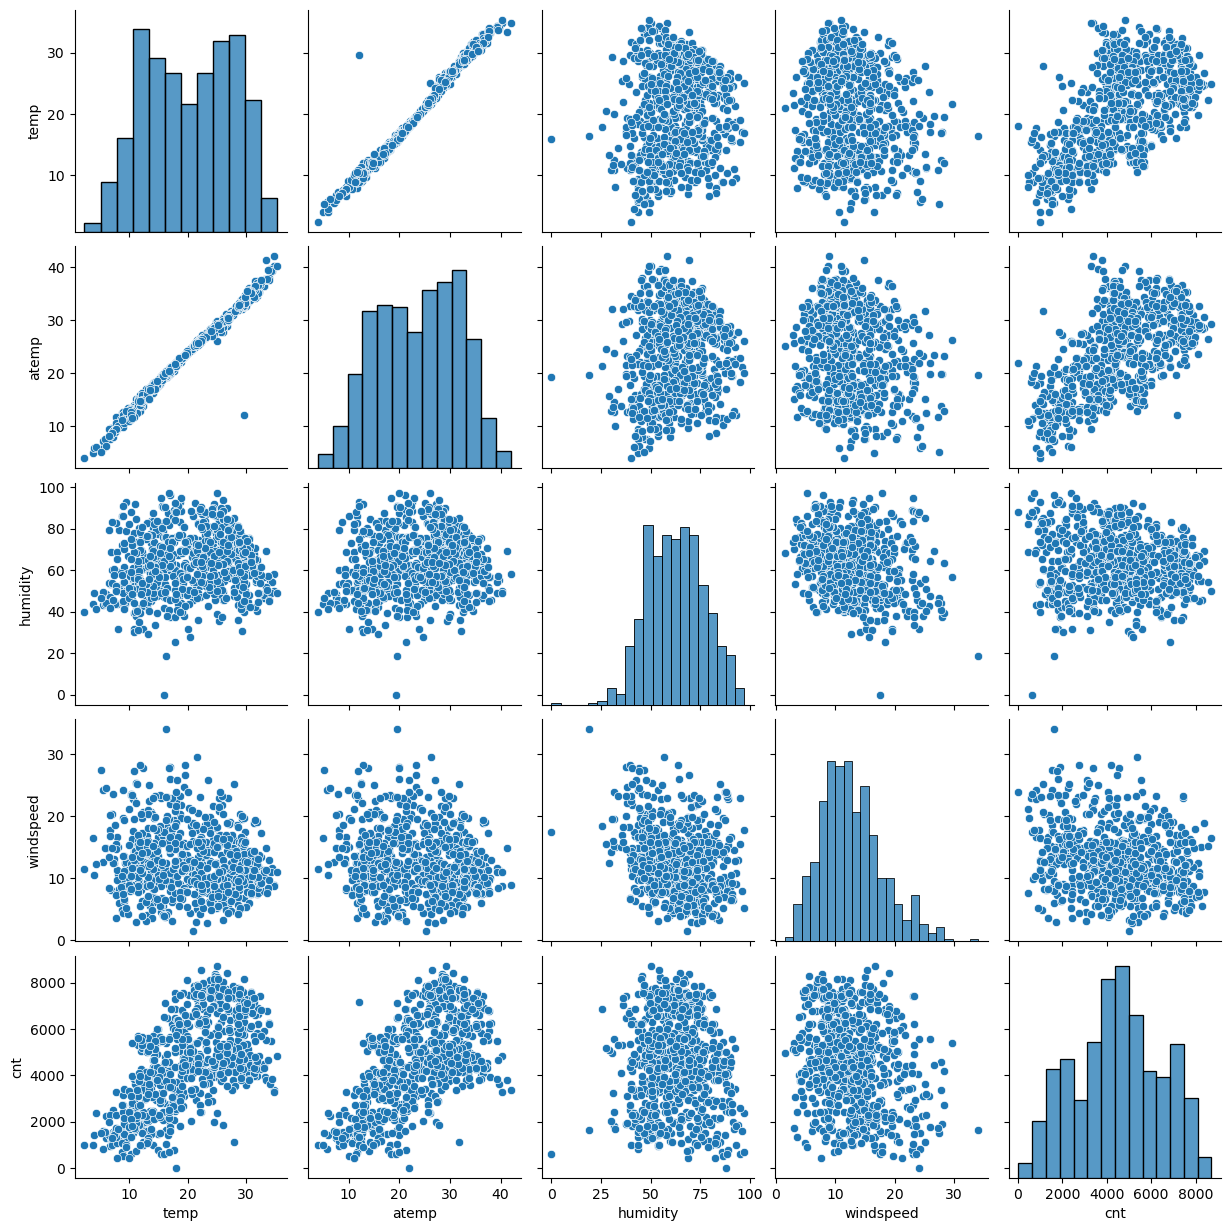

In [779]:
#plotting scatter plots for continous variables
plt.figure(figsize=(20,20))
sns.pairplot(data=df_bike,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

Some important points which can be noticed after looking at the scatter plots of continous variables:
1. Temperature seems to have a good relationship with our target variable
2. Atemp and our target variable are closely co-related and the a-temp seems to have a strong relationship with temp as well
3. Hence,by checking the VIF values we can decide which variable is significant to our model

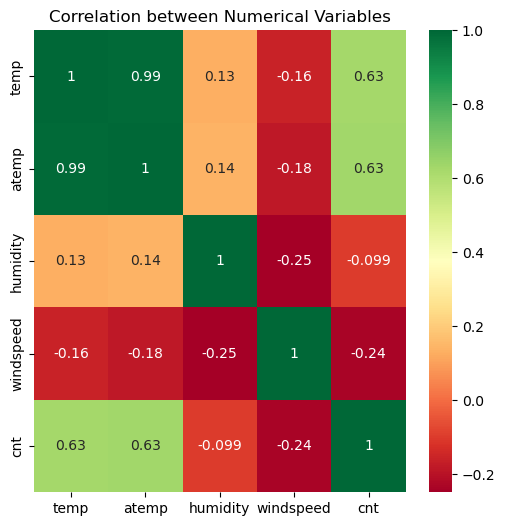

In [780]:
#checking correlation of continous variables
plt.figure(figsize = (6,6))
sns.heatmap(df_bike[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation between Numerical Variables")
plt.show()

The correlation matrix also confirms that just by visualisation of our data we can say that temperature is a significant contributor in designing our model

# Analysis of categorical variables

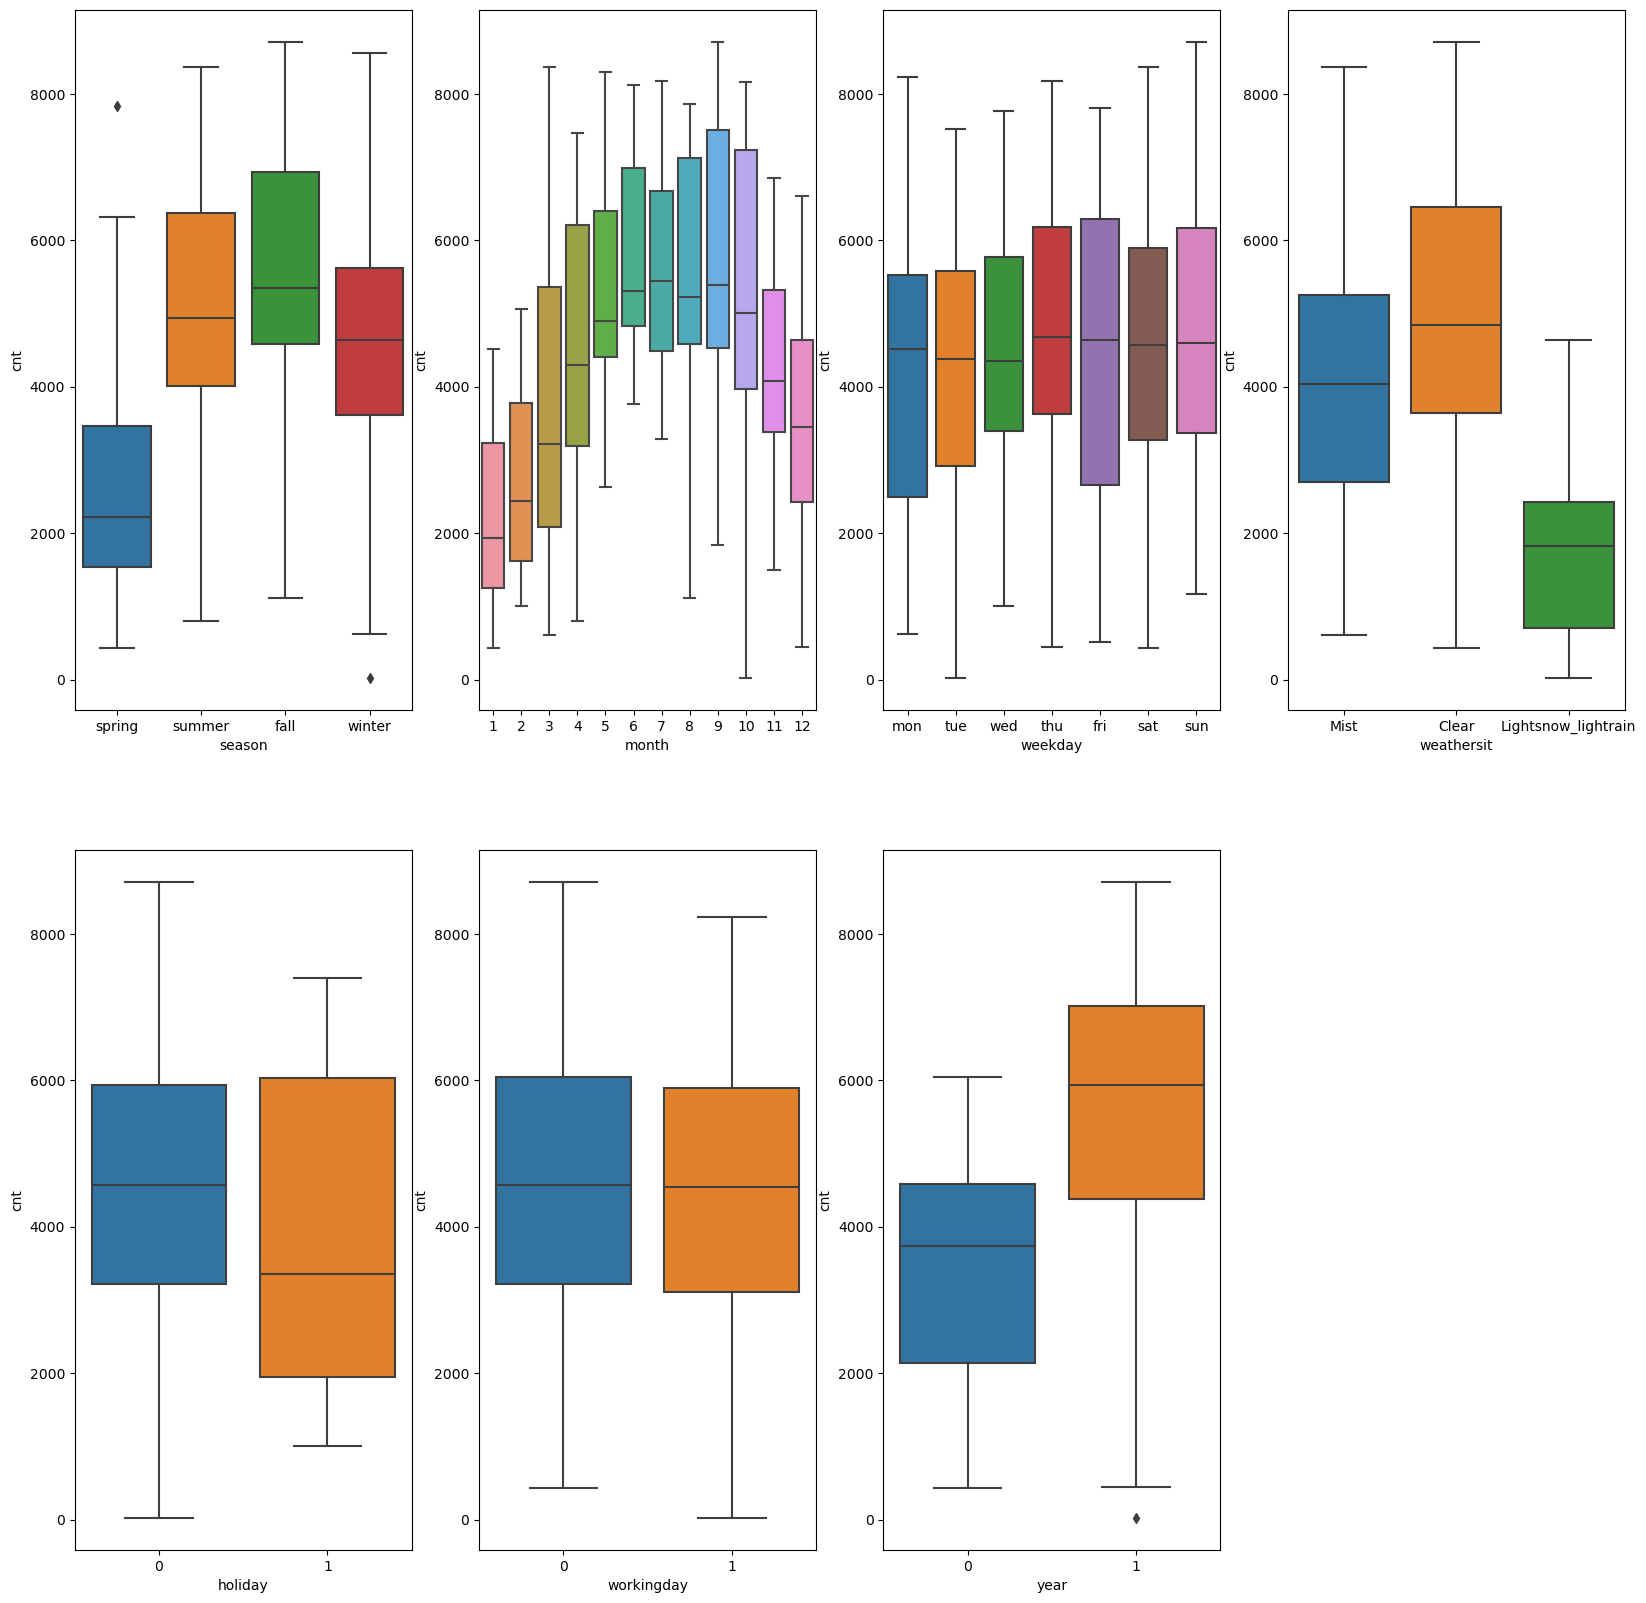

In [781]:
#plotting box plots for categorical variables

plt.figure(figsize=(20, 20))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df_bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df_bike)
plt.show()

From the above visualisation we can see that:
1. Except for working day and week-day we can observe a considerable impact of the categorical variables on our target variable
2. However,we cannot deny the impact of working day and week-day. We can say that the impact is considerably less than other categorical variables

# Deep Analysis of categorical variables 

In [782]:
#Creating a user defined function for plotting the bar chart for categorical variables

def bar_plot(column):
    plt.figure(figsize = (6,6))
    sns.barplot(x=column,y='cnt',data=df_bike,hue='year',color='steelblue')
    plt.legend(['2018','2019'])
    plt.show()

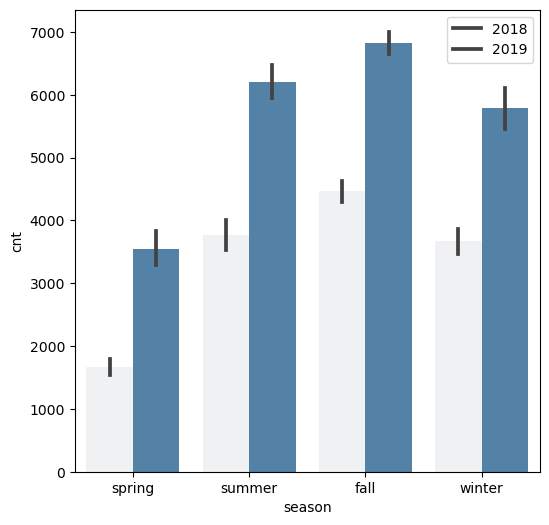

In [783]:
# plotting visualization for season column
bar_plot('season')

Fall season has attracted more bookings followed by summer season. It is also seen that the number of bookings have increased dramatically from 2018 to 2019

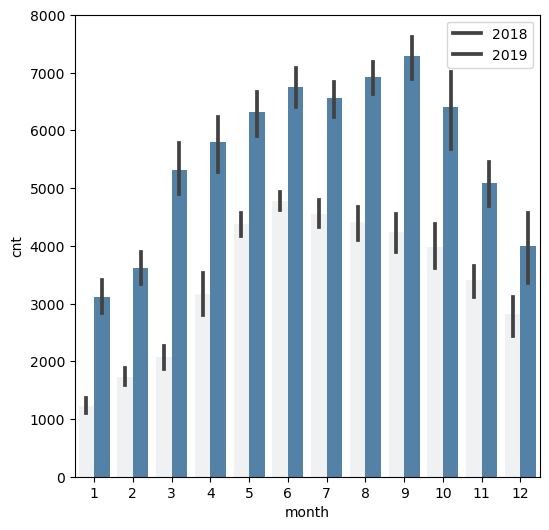

In [784]:
#plotting the bar for month

bar_plot('month')

September , August and June are the three months where we are seeing most bookings

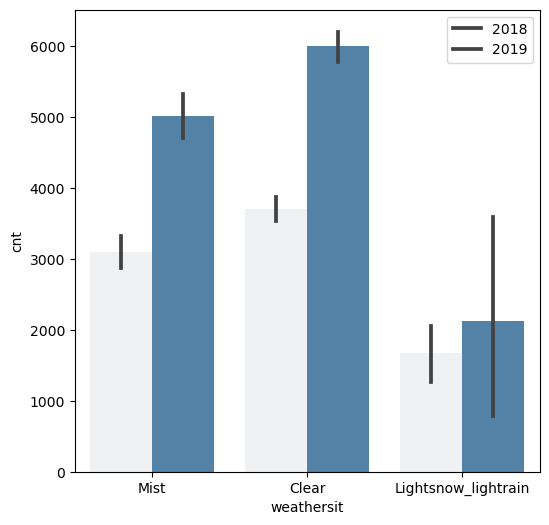

In [785]:
#plotting the bar for weather
bar_plot('weathersit')

Clear and Misty weather has attracted more bookings as compared to a weather of lightsnow_lightrain

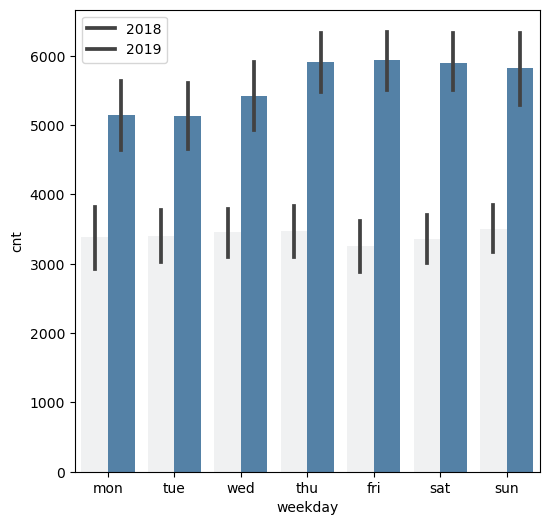

In [786]:
#plotting the bar for weekday
bar_plot('weekday')

Thursday,Friday,Saturday and Sunday have more number of bookings as compared to other days of the week

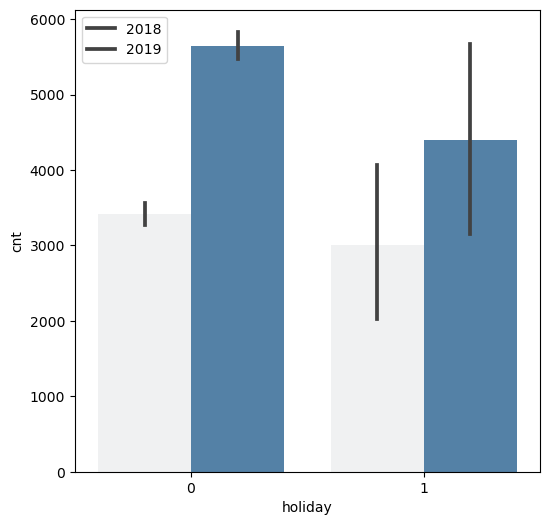

In [787]:
#plotting the bar for holiday
bar_plot('holiday')

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

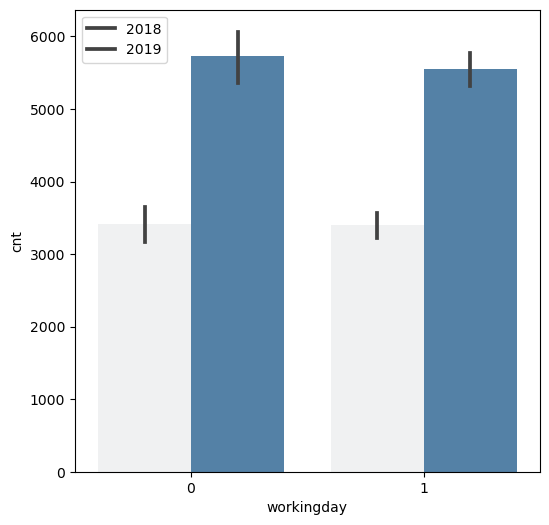

In [788]:
bar_plot('workingday')

It does not matter if its a working day or not ..hence the impact of bookings does not seem to be dependant on the working day

# Step 2- PREPARING THE DATA FOR MODELING

In [789]:
#Creating dummies for the categorical variables month,weekdays,weathersit and seasons 

months_df=pd.get_dummies(df_bike.month,drop_first=True)
weekdays_df=pd.get_dummies(df_bike.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df_bike.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df_bike.season,drop_first=True)

In [790]:
#Merging the dataset with the dummy variables

df_bike_new = pd.concat([df_bike,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [791]:
#Dropping columns season,month,weekday and weathersit as it is of no use now that the dummy variables are created

df_bike_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [792]:
#Checking the dataset after merging and removing

df_bike_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,2,3,...,sat,sun,thu,tue,wed,Lightsnow_lightrain,Mist,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [793]:
#Checking the data types of our dataset

df_bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   humidity             730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   2                    730 non-null    uint8  
 9   3                    730 non-null    uint8  
 10  4                    730 non-null    uint8  
 11  5                    730 non-null    uint8  
 12  6                    730 non-null    uint8  
 13  7                    730 non-null    uint8  
 14  8                    730 non-null    uint8  
 15  9                    730 non-null    uin

# Splitting into train and test data

In [794]:
#We have split the data into 70% training and 30% test

np.random.seed(0)
df_train, df_test = train_test_split(df_bike_new, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


# Rescaling the features

In [795]:
#Scaling the values using MinMax scaler for better comparibility of data

scaling = MinMaxScaler()

In [796]:
# Applying scaling to all the columns except the 'yes-no' and 'dummy' variables
numeric_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[numeric_vars] = scaling.fit_transform(df_train[numeric_vars])

In [797]:
#Checking our training data set
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,2,3,...,sat,sun,thu,tue,wed,Lightsnow_lightrain,Mist,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,1,0,1,0


In [798]:
#Checking the statistical values of training dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,2,3,...,sat,sun,thu,tue,wed,Lightsnow_lightrain,Mist,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.066667,0.098039,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.249689,0.297660,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [799]:
#Checking the data types on our training data set

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   temp                 510 non-null    float64
 4   atemp                510 non-null    float64
 5   humidity             510 non-null    float64
 6   windspeed            510 non-null    float64
 7   cnt                  510 non-null    float64
 8   2                    510 non-null    uint8  
 9   3                    510 non-null    uint8  
 10  4                    510 non-null    uint8  
 11  5                    510 non-null    uint8  
 12  6                    510 non-null    uint8  
 13  7                    510 non-null    uint8  
 14  8                    510 non-null    uint8  
 15  9                    510 non-null    u

# STEP 3 - TRAINING THE MODEL

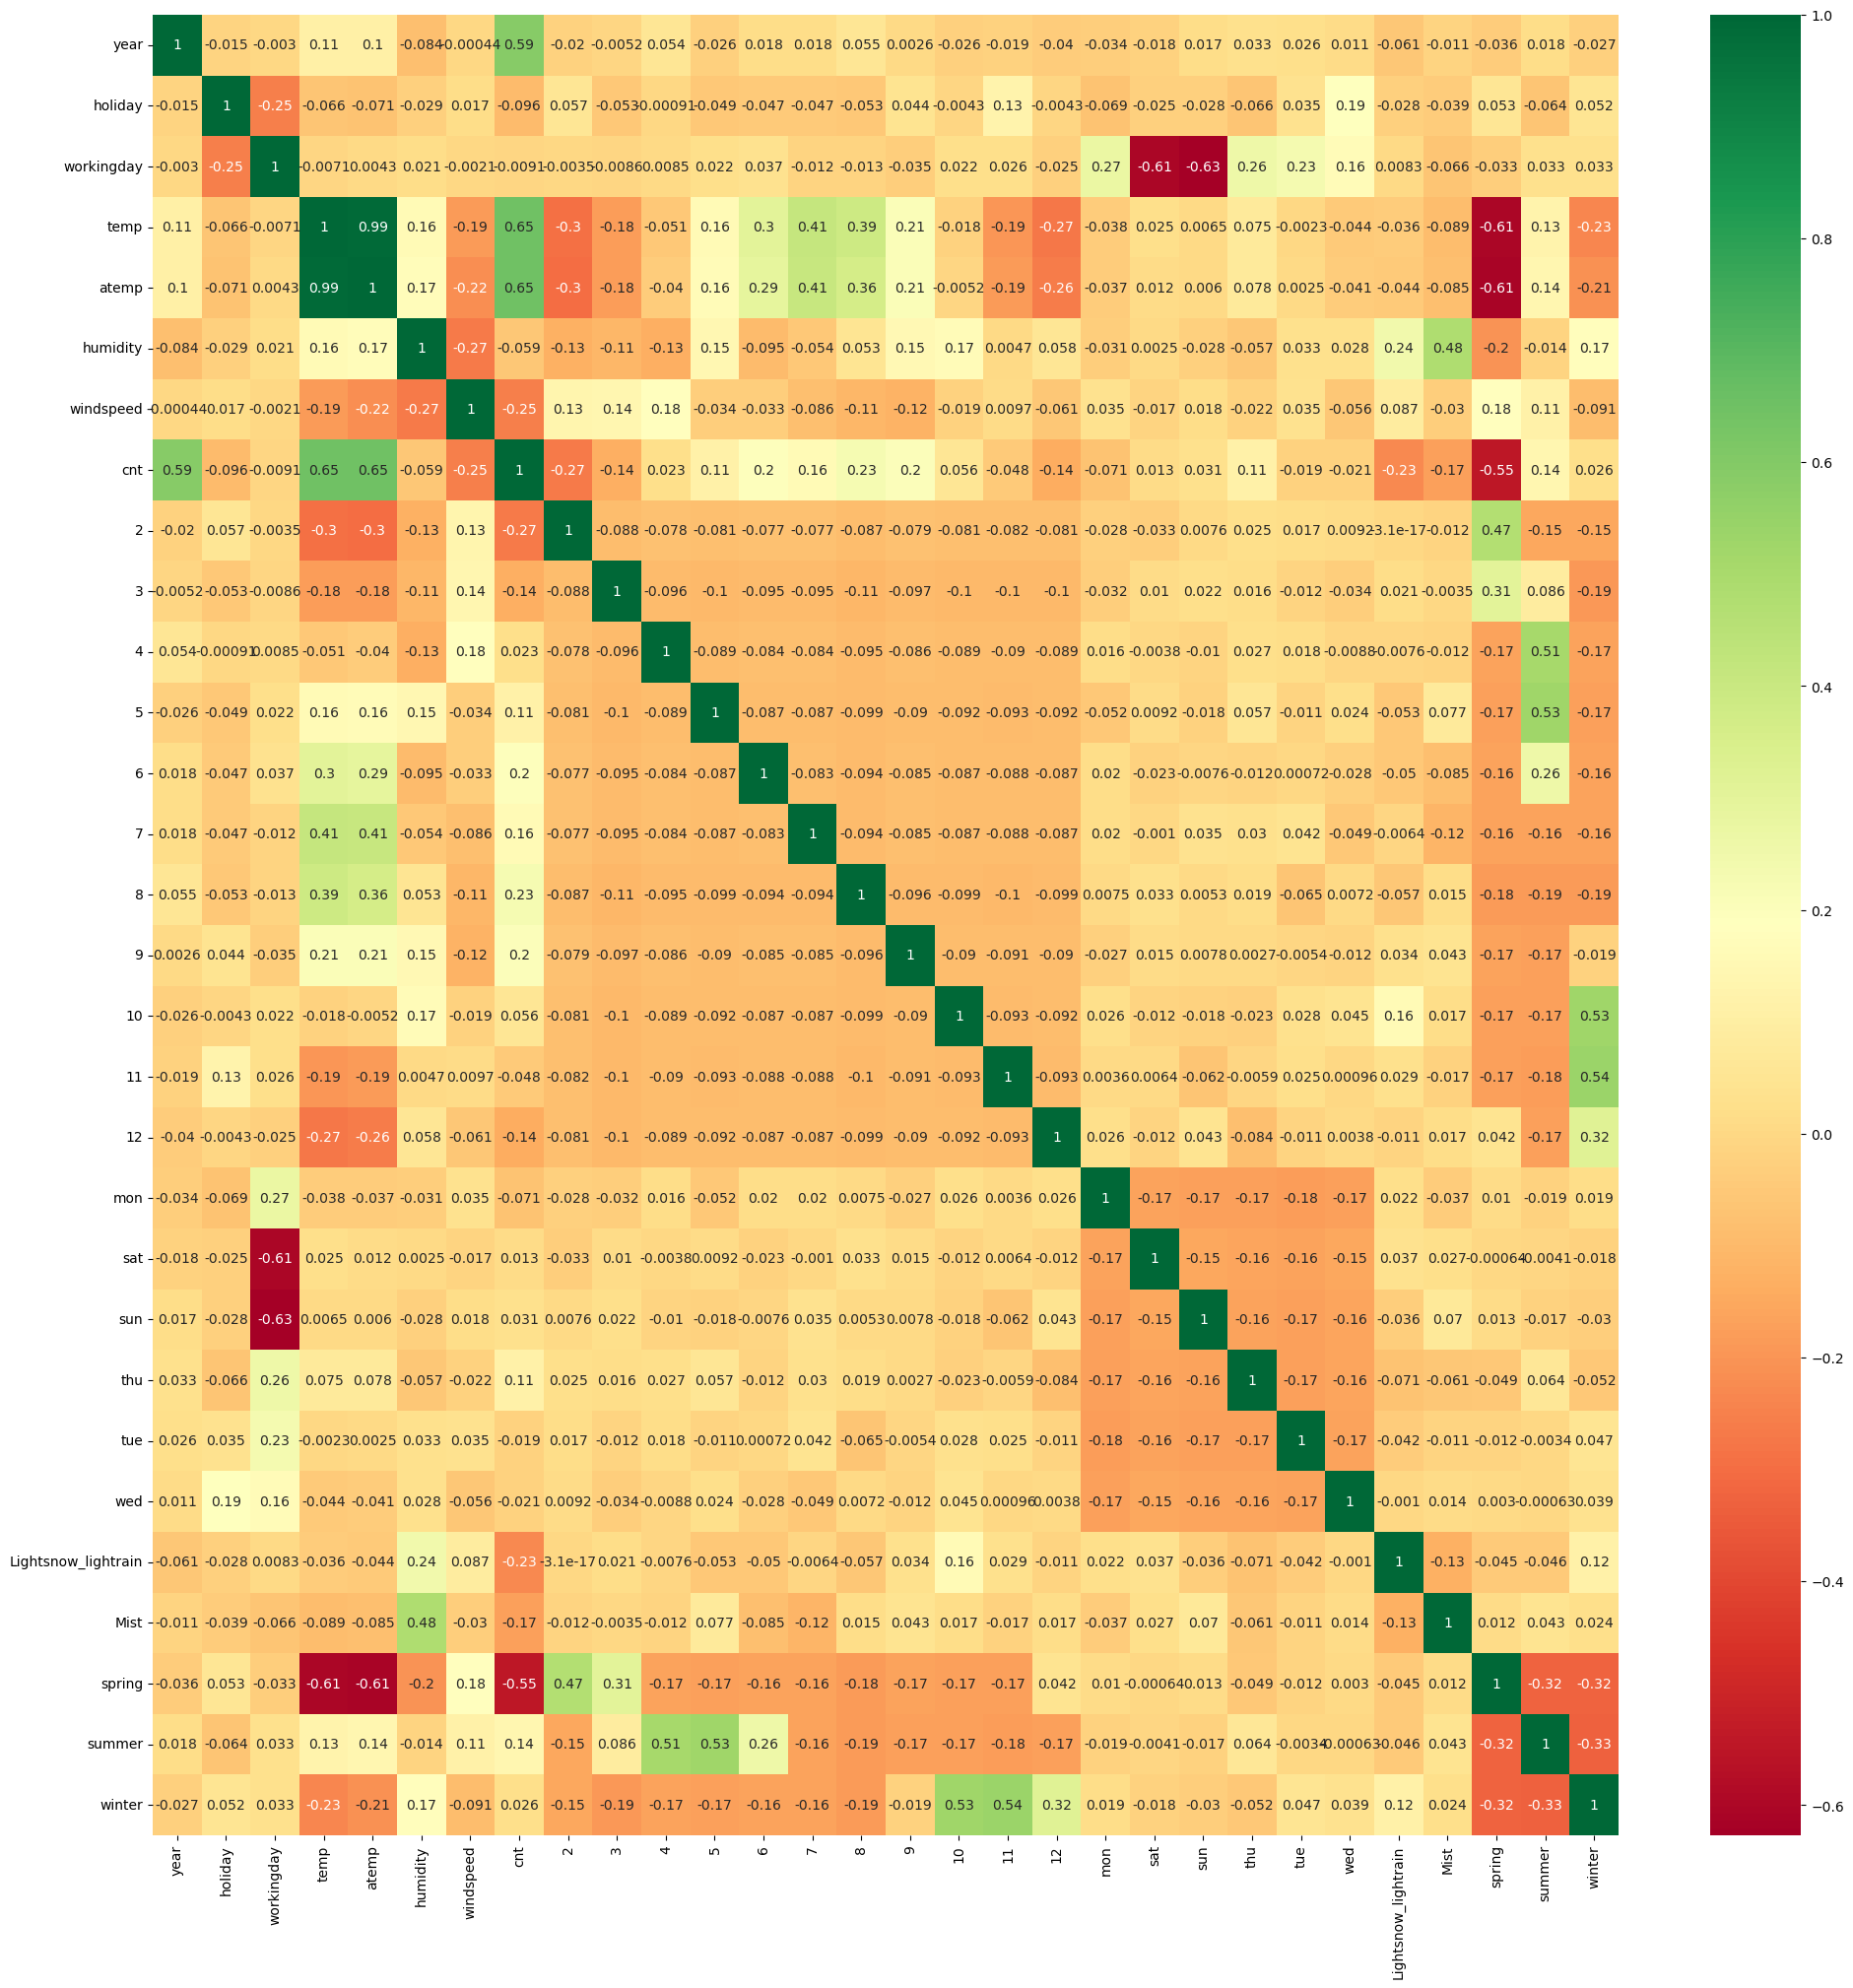

In [800]:
#Computing the correlation in the training dataset

plt.figure(figsize = (24,24))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

In [801]:
#Creating X_train,Y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [802]:
#Checking our X_train
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,2,3,4,...,sat,sun,thu,tue,wed,Lightsnow_lightrain,Mist,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,1,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,1,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,0,1,...,0,1,0,0,0,0,1,0,1,0


In [803]:
#Checking our y train
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [804]:
#Checking the data types of x train
X_train.dtypes

year                     int64
holiday                  int64
workingday               int64
temp                   float64
atemp                  float64
humidity               float64
windspeed              float64
2                        uint8
3                        uint8
4                        uint8
5                        uint8
6                        uint8
7                        uint8
8                        uint8
9                        uint8
10                       uint8
11                       uint8
12                       uint8
mon                      uint8
sat                      uint8
sun                      uint8
thu                      uint8
tue                      uint8
wed                      uint8
Lightsnow_lightrain      uint8
Mist                     uint8
spring                   uint8
summer                   uint8
winter                   uint8
dtype: object

In [805]:
X_train.columns = X_train.columns.astype(str)

In [806]:
#As the number of variables are more we will use RFE to predict the first 25 variables and then work our way through our model

lr=LinearRegression()
lr.fit(X_train,y_train)
rfe=RFE(estimator=lr,n_features_to_select=25)
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=25)

In [807]:
#Having a look at all the  25 columns as selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('2', True, 1),
 ('3', True, 1),
 ('4', True, 1),
 ('5', True, 1),
 ('6', True, 1),
 ('7', True, 1),
 ('8', True, 1),
 ('9', True, 1),
 ('10', True, 1),
 ('11', False, 2),
 ('12', False, 3),
 ('mon', True, 1),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 5),
 ('tue', True, 1),
 ('wed', False, 4),
 ('Lightsnow_lightrain', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [808]:
#Printing all the columns selected by rfe

selected_columns = X_train.columns[rfe.support_]
print(selected_columns)

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'mon', 'sat',
       'sun', 'tue', 'Lightsnow_lightrain', 'Mist', 'spring', 'summer',
       'winter'],
      dtype='object')


In [809]:
#Printing all the columns not selected by RFE
X_train.columns[~rfe.support_]


Index(['11', '12', 'thu', 'wed'], dtype='object')

In [810]:
#Computing all the selected columns in a variable known as X_train_selected
X_train_selected = X_train[selected_columns]
X_train_selected.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,2,3,4,...,10,mon,sat,sun,tue,Lightsnow_lightrain,Mist,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,1,0,...,0,0,0,1,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,1,...,0,0,0,1,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,0,1,...,0,0,0,1,0,0,1,0,1,0


# Building a linear model

In [811]:
#Adding a constant as it does not have a built in constant
X_train_selected= sm.add_constant(X_train_selected)

In [812]:
#Building our first linear model

lr1=sm.OLS(y_train,X_train_selected)
lr1=lr1.fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.5
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.41e-181
Time:                        22:53:35   Log-Likelihood:                 522.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     484   BIC:                            -882.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3304      0.081      4.070      0.000       0.171       0.490
year                    0.2308      0.008     28.443      0.000       0.215       0.247
holiday                -0.1323      0.065     -2.045      0.041      -0.259      -0.005
workingday             -0.0537      0.070     -0.763      0.446      -0.192       0.085
temp                    0.3954      0.143      2.768      0.006       0.115       0.676
atemp                   0.0566      0.139      0.407      0.684      -0.217       0.330
humidity               -0.1583      0.039     -4.083      0.000      -0.234      -0.082
windspeed              -0.1778      0.026     -6.712      0.000      -0.230      -0.126
2                       0.0216      0.019      1.112      0.267      -0.017       0.060
3                       0.0572      0.020      2.842      0.005       0.018       0.097
4                       0.0522      0.031      1.703      0.089      -0.008       0.112
5                       0.0765      0.033      2.313      0.021       0.012       0.141
6                       0.0577      0.034      1.672      0.095      -0.010       0.125
7                       0.0169      0.038      0.449      0.654      -0.057       0.091
8                       0.0736      0.036      2.062      0.040       0.003       0.144
9                       0.1362      0.029      4.640      0.000       0.079       0.194
10                      0.0460      0.019      2.486      0.013       0.010       0.082
mon                    -0.0224      0.012     -1.886      0.060      -0.046       0.001
sat                    -0.0470      0.070     -0.669      0.504      -0.185       0.091
sun                    -0.0414      0.070     -0.590      0.556      -0.179       0.097
tue                    -0.0243      0.012     -2.042      0.042      -0.048      -0.001
Lightsnow_lightrain    -0.2496      0.027     -9.411      0.000      -0.302      -0.198
Mist                   -0.0583      0.010     -5.553      0.000      -0.079      -0.038
spring                 -0.0502      0.028     -1.792      0.074      -0.105       0.005
summer                  0.0410      0.026      1.596      0.111      -0.009       0.091
winter                  0.1184      0.027      4.450      0.000       0.066       0.171
==============================================================================
Omnibus:                       77.221   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.841
Skew:                          -0.755   Prob(JB):                     8.99e-45
Kurtosis:                       5.695   Cond. No.                         91.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

Now we will drop variables based on:
1. Significance - p values 
2. VIF values - How are the independent variables correlated 
3. We are using a hybrid approach of building the model

# VIF

In [813]:
#Checking for VIF
vif = pd.DataFrame()
vif['Features'] = X_train_selected.columns
vif['VIF'] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,422.28
4,temp,66.60
3,workingday,65.13
5,atemp,55.79
19,sun,37.40
18,sat,35.58
23,spring,9.25
25,winter,8.44
24,summer,7.86
14,8,7.09


Dropping all columns with high vif value as well as high p value
Note- Anything >0.05 is assumed to have a high p value
First we will be dropping a temp

In [814]:
#dropping the column a temp as it has high p value as well as high vif value
X= X_train_selected.drop('atemp',axis=1)
X.head()

,const,year,holiday,workingday,temp,humidity,windspeed,2,3,4,...,10,mon,sat,sun,tue,Lightsnow_lightrain,Mist,spring,summer,winter
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,1,0,...,0,0,0,1,0,0,1,1,0,0
728,1.0,1,0,1,0.245101,0.498067,0.663106,0,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,0,1,...,0,0,0,1,0,0,1,0,1,0
111,1.0,0,0,0,0.345824,0.751824,0.380981,0,0,1,...,0,0,0,1,0,0,1,0,1,0


BUILDING 2ND MODEL

In [815]:
X_train_sm= sm.add_constant(X)
lr2=sm.OLS(y_train,X_train_sm)
lr2=lr2.fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     114.2
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.42e-182
Time:                        22:53:35   Log-Likelihood:                 522.16
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     485   BIC:                            -888.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3300      0.081      4.069      0.000       0.171       0.489
year                    0.2307      0.008     28.467      0.000       0.215       0.247
holiday                -0.1326      0.065     -2.051      0.041      -0.260      -0.006
workingday             -0.0533      0.070     -0.758      0.449      -0.191       0.085
temp                    0.4505      0.046      9.873      0.000       0.361       0.540
humidity               -0.1578      0.039     -4.075      0.000      -0.234      -0.082
windspeed              -0.1801      0.026     -6.968      0.000      -0.231      -0.129
2                       0.0216      0.019      1.114      0.266      -0.016       0.060
3                       0.0571      0.020      2.839      0.005       0.018       0.097
4                       0.0523      0.031      1.708      0.088      -0.008       0.112
5                       0.0757      0.033      2.296      0.022       0.011       0.141
6                       0.0564      0.034      1.643      0.101      -0.011       0.124
7                       0.0158      0.038      0.420      0.674      -0.058       0.090
8                       0.0718      0.035      2.029      0.043       0.002       0.141
9                       0.1355      0.029      4.628      0.000       0.078       0.193
10                      0.0459      0.018      2.480      0.013       0.010       0.082
mon                    -0.0224      0.012     -1.885      0.060      -0.046       0.001
sat                    -0.0470      0.070     -0.670      0.503      -0.185       0.091
sun                    -0.0410      0.070     -0.585      0.559      -0.179       0.097
tue                    -0.0243      0.012     -2.041      0.042      -0.048      -0.001
Lightsnow_lightrain    -0.2504      0.026     -9.470      0.000      -0.302      -0.198
Mist                   -0.0583      0.010     -5.563      0.000      -0.079      -0.038
spring                 -0.0498      0.028     -1.780      0.076      -0.105       0.005
summer                  0.0416      0.026      1.623      0.105      -0.009       0.092
winter                  0.1190      0.027      4.482      0.000       0.067       0.171
==============================================================================
Omnibus:                       76.513   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.452
Skew:                          -0.749   Prob(JB):                     2.97e-44
Kurtosis:                       5.681   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [816]:
#Checking for the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,422.24
3,workingday,65.12
18,sun,37.40
17,sat,35.58
22,spring,9.24
24,winter,8.42
23,summer,7.83
13,8,6.99
4,temp,6.81
2,holiday,6.66


In [817]:
#Dropping working day as it has a high p value and high vif value as well
X= X.drop('workingday',axis=1)
X.head()

,const,year,holiday,temp,humidity,windspeed,2,3,4,5,...,10,mon,sat,sun,tue,Lightsnow_lightrain,Mist,spring,summer,winter
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


BUILDING 3RD LINEAR MODEL

In [818]:
X_train_sm= sm.add_constant(X)
lr3=sm.OLS(y_train,X_train_sm)
lr3=lr3.fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     119.3
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.91e-183
Time:                        22:53:36   Log-Likelihood:                 521.86
No. Observations:                 510   AIC:                            -995.7
Df Residuals:                     486   BIC:                            -894.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2761      0.039      7.128      0.000       0.200       0.352
year                    0.2310      0.008     28.582      0.000       0.215       0.247
holiday                -0.0876      0.026     -3.423      0.001      -0.138      -0.037
temp                    0.4514      0.046      9.899      0.000       0.362       0.541
humidity               -0.1568      0.039     -4.054      0.000      -0.233      -0.081
windspeed              -0.1809      0.026     -7.006      0.000      -0.232      -0.130
2                       0.0217      0.019      1.119      0.264      -0.016       0.060
3                       0.0567      0.020      2.823      0.005       0.017       0.096
4                       0.0523      0.031      1.708      0.088      -0.008       0.112
5                       0.0751      0.033      2.280      0.023       0.010       0.140
6                       0.0559      0.034      1.631      0.104      -0.011       0.123
7                       0.0155      0.038      0.413      0.680      -0.058       0.089
8                       0.0715      0.035      2.021      0.044       0.002       0.141
9                       0.1358      0.029      4.641      0.000       0.078       0.193
10                      0.0469      0.018      2.541      0.011       0.011       0.083
mon                    -0.0227      0.012     -1.908      0.057      -0.046       0.001
sat                     0.0052      0.013      0.416      0.677      -0.019       0.030
sun                     0.0113      0.012      0.914      0.361      -0.013       0.036
tue                    -0.0242      0.012     -2.039      0.042      -0.048      -0.001
Lightsnow_lightrain    -0.2503      0.026     -9.472      0.000      -0.302      -0.198
Mist                   -0.0582      0.010     -5.553      0.000      -0.079      -0.038
spring                 -0.0491      0.028     -1.758      0.079      -0.104       0.006
summer                  0.0419      0.026      1.636      0.102      -0.008       0.092
winter                  0.1181      0.027      4.453      0.000       0.066       0.170
==============================================================================
Omnibus:                       76.325   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.099
Skew:                          -0.752   Prob(JB):                     1.59e-43
Kurtosis:                       5.648   Cond. No.                         33.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [819]:
#Checking for vif values again
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,96.36
21,spring,9.23
23,winter,8.40
22,summer,7.83
12,8,6.99
3,temp,6.80
11,7,6.41
9,5,5.39
10,6,5.34
8,4,4.35


In [820]:
#removing spring as it has high p value and high vif value as well
X= X.drop('spring',axis=1)
X.head()

,const,year,holiday,temp,humidity,windspeed,2,3,4,5,...,9,10,mon,sat,sun,tue,Lightsnow_lightrain,Mist,summer,winter
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0


BUILDING OUR 4TH MODEL

In [821]:
#creating another model
X_train_sm= sm.add_constant(X)
lr4=sm.OLS(y_train,X_train_sm)
lr4=lr4.fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     124.0
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.19e-183
Time:                        22:53:36   Log-Likelihood:                 520.24
No. Observations:                 510   AIC:                            -994.5
Df Residuals:                     487   BIC:                            -897.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2303      0.029      8.016      0.000       0.174       0.287
year                    0.2303      0.008     28.467      0.000       0.214       0.246
holiday                -0.0871      0.026     -3.395      0.001      -0.137      -0.037
temp                    0.4691      0.045     10.528      0.000       0.382       0.557
humidity               -0.1597      0.039     -4.123      0.000      -0.236      -0.084
windspeed              -0.1830      0.026     -7.081      0.000      -0.234      -0.132
2                       0.0161      0.019      0.842      0.400      -0.022       0.054
3                       0.0564      0.020      2.804      0.005       0.017       0.096
4                       0.0640      0.030      2.138      0.033       0.005       0.123
5                       0.0841      0.033      2.578      0.010       0.020       0.148
6                       0.0728      0.033      2.207      0.028       0.008       0.138
7                       0.0490      0.032      1.508      0.132      -0.015       0.113
8                       0.1061      0.029      3.599      0.000       0.048       0.164
9                       0.1637      0.025      6.646      0.000       0.115       0.212
10                      0.0477      0.018      2.582      0.010       0.011       0.084
mon                    -0.0236      0.012     -1.982      0.048      -0.047      -0.000
sat                     0.0045      0.013      0.355      0.723      -0.020       0.029
sun                     0.0113      0.012      0.911      0.363      -0.013       0.036
tue                    -0.0248      0.012     -2.083      0.038      -0.048      -0.001
Lightsnow_lightrain    -0.2468      0.026     -9.346      0.000      -0.299      -0.195
Mist                   -0.0578      0.010     -5.504      0.000      -0.078      -0.037
summer                  0.0702      0.020      3.525      0.000       0.031       0.109
winter                  0.1566      0.015     10.476      0.000       0.127       0.186
==============================================================================
Omnibus:                       72.171   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.480
Skew:                          -0.725   Prob(JB):                     1.06e-39
Kurtosis:                       5.518   Cond. No.                         31.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [822]:
#Checking for vif values again
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.79
3,temp,6.47
9,5,5.26
10,6,4.92
12,8,4.83
11,7,4.77
21,summer,4.72
8,4,4.15
13,9,2.87
22,winter,2.66


In [823]:
#removing 7TH MONTH as it has high p value 
X= X.drop('7',axis=1)
X.head()

,const,year,holiday,temp,humidity,windspeed,2,3,4,5,...,9,10,mon,sat,sun,tue,Lightsnow_lightrain,Mist,summer,winter
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0


BUILDING OUR 5TH LINEAR MODEL

In [824]:
X_train_sm= sm.add_constant(X)
lr5=sm.OLS(y_train,X_train_sm)
lr5=lr5.fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.5
Date:                Tue, 30 May 2023   Prob (F-statistic):          3.19e-184
Time:                        22:53:36   Log-Likelihood:                 519.05
No. Observations:                 510   AIC:                            -994.1
Df Residuals:                     488   BIC:                            -900.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2303      0.029      8.006      0.000       0.174       0.287
year                    0.2290      0.008     28.427      0.000       0.213       0.245
holiday                -0.0915      0.026     -3.585      0.000      -0.142      -0.041
temp                    0.5244      0.025     20.681      0.000       0.475       0.574
humidity               -0.1717      0.038     -4.524      0.000      -0.246      -0.097
windspeed              -0.1863      0.026     -7.225      0.000      -0.237      -0.136
2                       0.0083      0.018      0.450      0.653      -0.028       0.045
3                       0.0407      0.017      2.361      0.019       0.007       0.074
4                       0.0421      0.026      1.606      0.109      -0.009       0.094
5                       0.0546      0.026      2.088      0.037       0.003       0.106
6                       0.0365      0.023      1.616      0.107      -0.008       0.081
8                       0.0703      0.018      4.015      0.000       0.036       0.105
9                       0.1367      0.017      8.060      0.000       0.103       0.170
10                      0.0384      0.017      2.202      0.028       0.004       0.073
mon                    -0.0223      0.012     -1.880      0.061      -0.046       0.001
sat                     0.0043      0.013      0.339      0.735      -0.021       0.029
sun                     0.0119      0.012      0.959      0.338      -0.012       0.036
tue                    -0.0237      0.012     -1.990      0.047      -0.047      -0.000
Lightsnow_lightrain    -0.2428      0.026     -9.229      0.000      -0.295      -0.191
Mist                   -0.0561      0.010     -5.370      0.000      -0.077      -0.036
summer                  0.0728      0.020      3.663      0.000       0.034       0.112
winter                  0.1458      0.013     11.083      0.000       0.120       0.172
==============================================================================
Omnibus:                       65.302   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.139
Skew:                          -0.683   Prob(JB):                     1.52e-33
Kurtosis:                       5.291   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [825]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.79
20,summer,4.69
9,5,3.37
8,4,3.17
10,6,2.30
3,temp,2.09
21,winter,2.06
4,humidity,1.95
11,8,1.70
7,3,1.67


In [826]:
#Removing 2nd month as it has high P value
X= X.drop('2',axis=1)
X.head()

,const,year,holiday,temp,humidity,windspeed,3,4,5,6,...,9,10,mon,sat,sun,tue,Lightsnow_lightrain,Mist,summer,winter
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0


BUILDING OUR 6TH LINEAR MODEL

In [827]:
X_train_sm= sm.add_constant(X)
lr6=sm.OLS(y_train,X_train_sm)
lr6=lr6.fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.2
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.98e-185
Time:                        22:53:37   Log-Likelihood:                 518.95
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     489   BIC:                            -907.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2335      0.028      8.388      0.000       0.179       0.288
year                    0.2291      0.008     28.463      0.000       0.213       0.245
holiday                -0.0912      0.025     -3.580      0.000      -0.141      -0.041
temp                    0.5216      0.025     21.224      0.000       0.473       0.570
humidity               -0.1721      0.038     -4.539      0.000      -0.247      -0.098
windspeed              -0.1852      0.026     -7.219      0.000      -0.236      -0.135
3                       0.0385      0.017      2.330      0.020       0.006       0.071
4                       0.0402      0.026      1.554      0.121      -0.011       0.091
5                       0.0533      0.026      2.053      0.041       0.002       0.104
6                       0.0355      0.022      1.580      0.115      -0.009       0.080
8                       0.0694      0.017      3.993      0.000       0.035       0.104
9                       0.1359      0.017      8.063      0.000       0.103       0.169
10                      0.0386      0.017      2.218      0.027       0.004       0.073
mon                    -0.0227      0.012     -1.913      0.056      -0.046       0.001
sat                     0.0041      0.013      0.322      0.748      -0.021       0.029
sun                     0.0118      0.012      0.952      0.342      -0.013       0.036
tue                    -0.0237      0.012     -1.989      0.047      -0.047      -0.000
Lightsnow_lightrain    -0.2426      0.026     -9.229      0.000      -0.294      -0.191
Mist                   -0.0562      0.010     -5.377      0.000      -0.077      -0.036
summer                  0.0727      0.020      3.662      0.000       0.034       0.112
winter                  0.1439      0.012     11.618      0.000       0.120       0.168
==============================================================================
Omnibus:                       66.113   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.878
Skew:                          -0.689   Prob(JB):                     3.85e-34
Kurtosis:                       5.312   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [828]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,49.54
19,summer,4.69
8,5,3.33
7,4,3.08
9,6,2.28
3,temp,1.97
4,humidity,1.95
20,winter,1.82
10,8,1.68
18,Mist,1.58


In [829]:
#Removing 4 as it has high p value 
X= X.drop('4',axis=1)
X.head()

,const,year,holiday,temp,humidity,windspeed,3,5,6,8,9,10,mon,sat,sun,tue,Lightsnow_lightrain,Mist,summer,winter
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0,0,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,0,1,0,0,1,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,0,1,0,0,1,1,0


BUILDING OUR 7TH MODEL

In [830]:
X_train_sm= sm.add_constant(X)
lr7=sm.OLS(y_train,X_train_sm)
lr7=lr7.fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.8
Date:                Tue, 30 May 2023   Prob (F-statistic):          8.14e-186
Time:                        22:53:37   Log-Likelihood:                 517.69
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     490   BIC:                            -910.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2370      0.028      8.529      0.000       0.182       0.292
year                    0.2294      0.008     28.467      0.000       0.214       0.245
holiday                -0.0920      0.026     -3.605      0.000      -0.142      -0.042
temp                    0.5258      0.024     21.494      0.000       0.478       0.574
humidity               -0.1770      0.038     -4.680      0.000      -0.251      -0.103
windspeed              -0.1820      0.026     -7.108      0.000      -0.232      -0.132
3                       0.0262      0.015      1.803      0.072      -0.002       0.055
5                       0.0255      0.019      1.353      0.177      -0.012       0.063
6                       0.0153      0.018      0.833      0.405      -0.021       0.051
8                       0.0648      0.017      3.779      0.000       0.031       0.099
9                       0.1327      0.017      7.920      0.000       0.100       0.166
10                      0.0379      0.017      2.175      0.030       0.004       0.072
mon                    -0.0228      0.012     -1.921      0.055      -0.046       0.001
sat                     0.0040      0.013      0.318      0.750      -0.021       0.029
sun                     0.0115      0.012      0.925      0.355      -0.013       0.036
tue                    -0.0235      0.012     -1.975      0.049      -0.047      -0.000
Lightsnow_lightrain    -0.2421      0.026     -9.198      0.000      -0.294      -0.190
Mist                   -0.0560      0.010     -5.350      0.000      -0.077      -0.035
summer                  0.0966      0.013      7.672      0.000       0.072       0.121
winter                  0.1413      0.012     11.497      0.000       0.117       0.165
==============================================================================
Omnibus:                       67.834   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.593
Skew:                          -0.706   Prob(JB):                     6.01e-35
Kurtosis:                       5.328   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [831]:
#Checking for VIF values again
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.21
4,humidity,1.94
3,temp,1.94
18,summer,1.88
19,winter,1.79
7,5,1.75
9,8,1.63
17,Mist,1.58
8,6,1.51
11,10,1.50


In [832]:
#Removing sat as it has high p value

X= X.drop('sat',axis=1)
X.head()

,const,year,holiday,temp,humidity,windspeed,3,5,6,8,9,10,mon,sun,tue,Lightsnow_lightrain,Mist,summer,winter
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,1,0,0,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,1,0,0,1,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,1,0,0,1,1,0


BUILDING OUR 8TH MODEL

In [833]:
X_train_sm= sm.add_constant(X)
lr8=sm.OLS(y_train,X_train_sm)
lr8=lr8.fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     151.0
Date:                Tue, 30 May 2023   Prob (F-statistic):          6.86e-187
Time:                        22:53:37   Log-Likelihood:                 517.64
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     491   BIC:                            -916.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2382      0.028      8.650      0.000       0.184       0.292
year                    0.2293      0.008     28.494      0.000       0.214       0.245
holiday                -0.0923      0.025     -3.625      0.000      -0.142      -0.042
temp                    0.5261      0.024     21.538      0.000       0.478       0.574
humidity               -0.1775      0.038     -4.703      0.000      -0.252      -0.103
windspeed              -0.1821      0.026     -7.115      0.000      -0.232      -0.132
3                       0.0262      0.015      1.805      0.072      -0.002       0.055
5                       0.0255      0.019      1.350      0.178      -0.012       0.063
6                       0.0151      0.018      0.825      0.410      -0.021       0.051
8                       0.0648      0.017      3.782      0.000       0.031       0.098
9                       0.1327      0.017      7.926      0.000       0.100       0.166
10                      0.0379      0.017      2.175      0.030       0.004       0.072
mon                    -0.0237      0.011     -2.068      0.039      -0.046      -0.001
sun                     0.0105      0.012      0.875      0.382      -0.013       0.034
tue                    -0.0244      0.012     -2.117      0.035      -0.047      -0.002
Lightsnow_lightrain    -0.2417      0.026     -9.201      0.000      -0.293      -0.190
Mist                   -0.0558      0.010     -5.346      0.000      -0.076      -0.035
summer                  0.0966      0.013      7.677      0.000       0.072       0.121
winter                  0.1413      0.012     11.507      0.000       0.117       0.165
==============================================================================
Omnibus:                       67.549   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.808
Skew:                          -0.701   Prob(JB):                     5.40e-35
Kurtosis:                       5.336   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [834]:
#Checking for vif values again

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.39
3,temp,1.94
4,humidity,1.93
17,summer,1.88
18,winter,1.79
7,5,1.75
9,8,1.63
16,Mist,1.57
8,6,1.51
11,10,1.50


In [835]:
#DRopping sunday as it has a high p value
X= X.drop('sun',axis=1)
X.head()

,const,year,holiday,temp,humidity,windspeed,3,5,6,8,9,10,mon,tue,Lightsnow_lightrain,Mist,summer,winter
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,0,0,1,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,0,0,1,1,0


BUILDING OUR 9TH MODEL

In [836]:
X_train_sm= sm.add_constant(X)
lr9=sm.OLS(y_train,X_train_sm)
lr9=lr9.fit()
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.9
Date:                Tue, 30 May 2023   Prob (F-statistic):          7.81e-188
Time:                        22:53:37   Log-Likelihood:                 517.24
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     492   BIC:                            -922.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2406      0.027      8.789      0.000       0.187       0.294
year                    0.2294      0.008     28.507      0.000       0.214       0.245
holiday                -0.0932      0.025     -3.661      0.000      -0.143      -0.043
temp                    0.5268      0.024     21.582      0.000       0.479       0.575
humidity               -0.1790      0.038     -4.747      0.000      -0.253      -0.105
windspeed              -0.1815      0.026     -7.098      0.000      -0.232      -0.131
3                       0.0262      0.015      1.804      0.072      -0.002       0.055
5                       0.0251      0.019      1.329      0.184      -0.012       0.062
6                       0.0149      0.018      0.811      0.418      -0.021       0.051
8                       0.0643      0.017      3.758      0.000       0.031       0.098
9                       0.1325      0.017      7.920      0.000       0.100       0.165
10                      0.0379      0.017      2.176      0.030       0.004       0.072
mon                    -0.0258      0.011     -2.302      0.022      -0.048      -0.004
tue                    -0.0265      0.011     -2.348      0.019      -0.049      -0.004
Lightsnow_lightrain    -0.2421      0.026     -9.220      0.000      -0.294      -0.191
Mist                   -0.0551      0.010     -5.295      0.000      -0.075      -0.035
summer                  0.0963      0.013      7.660      0.000       0.072       0.121
winter                  0.1411      0.012     11.498      0.000       0.117       0.165
==============================================================================
Omnibus:                       64.536   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.490
Skew:                          -0.668   Prob(JB):                     7.71e-34
Kurtosis:                       5.322   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [837]:
#Checking for VIF values again
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.88
3,temp,1.94
4,humidity,1.93
16,summer,1.88
17,winter,1.79
7,5,1.75
9,8,1.63
15,Mist,1.56
8,6,1.51
11,10,1.50


In [838]:
#Dropping 3 as it has high p value

X= X.drop('3',axis=1)
X.head()

,const,year,holiday,temp,humidity,windspeed,5,6,8,9,10,mon,tue,Lightsnow_lightrain,Mist,summer,winter
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,0,1,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,0,1,1,0


BUILDING OUR 10TH MODEL

In [839]:
X_train_sm= sm.add_constant(X)
lr10=sm.OLS(y_train,X_train_sm)
lr10=lr10.fit()
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.0
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.96e-188
Time:                        22:53:38   Log-Likelihood:                 515.56
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     493   BIC:                            -925.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2467      0.027      9.056      0.000       0.193       0.300
year                    0.2293      0.008     28.437      0.000       0.213       0.245
holiday                -0.0963      0.025     -3.785      0.000      -0.146      -0.046
temp                    0.5244      0.024     21.467      0.000       0.476       0.572
humidity               -0.1794      0.038     -4.748      0.000      -0.254      -0.105
windspeed              -0.1796      0.026     -7.012      0.000      -0.230      -0.129
5                       0.0180      0.018      0.972      0.331      -0.018       0.054
6                       0.0090      0.018      0.499      0.618      -0.026       0.044
8                       0.0603      0.017      3.542      0.000       0.027       0.094
9                       0.1293      0.017      7.754      0.000       0.097       0.162
10                      0.0377      0.017      2.158      0.031       0.003       0.072
mon                    -0.0269      0.011     -2.392      0.017      -0.049      -0.005
tue                    -0.0269      0.011     -2.380      0.018      -0.049      -0.005
Lightsnow_lightrain    -0.2410      0.026     -9.159      0.000      -0.293      -0.189
Mist                   -0.0550      0.010     -5.277      0.000      -0.075      -0.035
summer                  0.0988      0.013      7.891      0.000       0.074       0.123
winter                  0.1365      0.012     11.346      0.000       0.113       0.160
==============================================================================
Omnibus:                       63.774   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.952
Skew:                          -0.645   Prob(JB):                     5.03e-35
Kurtosis:                       5.402   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [840]:
#DROPPING 6 AS IT HAS HIGH P VALUE

X= X.drop('6',axis=1)
X.head()

,const,year,holiday,temp,humidity,windspeed,5,8,9,10,mon,tue,Lightsnow_lightrain,Mist,summer,winter
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,1,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,1,1,0


BUILDING OUR 11TH LINEAR MODEL

In [841]:
X_train_sm= sm.add_constant(X)
lr11=sm.OLS(y_train,X_train_sm)
lr11=lr11.fit()
lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.5
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.45e-189
Time:                        22:53:38   Log-Likelihood:                 515.43
No. Observations:                 510   AIC:                            -998.9
Df Residuals:                     494   BIC:                            -931.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2462      0.027      9.051      0.000       0.193       0.300
year                    0.2291      0.008     28.467      0.000       0.213       0.245
holiday                -0.0966      0.025     -3.801      0.000      -0.147      -0.047
temp                    0.5294      0.022     23.804      0.000       0.486       0.573
humidity               -0.1807      0.038     -4.794      0.000      -0.255      -0.107
windspeed              -0.1805      0.026     -7.076      0.000      -0.231      -0.130
5                       0.0148      0.017      0.853      0.394      -0.019       0.049
8                       0.0578      0.016      3.549      0.000       0.026       0.090
9                       0.1276      0.016      7.831      0.000       0.096       0.160
10                      0.0370      0.017      2.126      0.034       0.003       0.071
mon                    -0.0267      0.011     -2.382      0.018      -0.049      -0.005
tue                    -0.0270      0.011     -2.386      0.017      -0.049      -0.005
Lightsnow_lightrain    -0.2412      0.026     -9.172      0.000      -0.293      -0.190
Mist                   -0.0549      0.010     -5.272      0.000      -0.075      -0.034
summer                  0.1005      0.012      8.307      0.000       0.077       0.124
winter                  0.1363      0.012     11.345      0.000       0.113       0.160
==============================================================================
Omnibus:                       63.938   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.121
Skew:                          -0.652   Prob(JB):                     1.26e-34
Kurtosis:                       5.377   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [842]:
#DROPPING 5 as it has high p value
X= X.drop('5',axis=1)
X.head()

,const,year,holiday,temp,humidity,windspeed,8,9,10,mon,tue,Lightsnow_lightrain,Mist,summer,winter
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,1,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,0,0,0,0,0,1,1,0


BUILDING OUR 12TH LINEAR MODEL

In [843]:
X_train_sm= sm.add_constant(X)
lr12=sm.OLS(y_train,X_train_sm)
lr12=lr12.fit()
lr12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.4
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.49e-190
Time:                        22:53:38   Log-Likelihood:                 515.06
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     495   BIC:                            -936.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2430      0.027      9.021      0.000       0.190       0.296
year                    0.2289      0.008     28.464      0.000       0.213       0.245
holiday                -0.0969      0.025     -3.814      0.000      -0.147      -0.047
temp                    0.5311      0.022     23.985      0.000       0.488       0.575
humidity               -0.1757      0.037     -4.720      0.000      -0.249      -0.103
windspeed              -0.1814      0.025     -7.115      0.000      -0.231      -0.131
8                       0.0568      0.016      3.497      0.001       0.025       0.089
9                       0.1266      0.016      7.793      0.000       0.095       0.158
10                      0.0365      0.017      2.103      0.036       0.002       0.071
mon                    -0.0272      0.011     -2.425      0.016      -0.049      -0.005
tue                    -0.0273      0.011     -2.415      0.016      -0.049      -0.005
Lightsnow_lightrain    -0.2429      0.026     -9.265      0.000      -0.294      -0.191
Mist                   -0.0551      0.010     -5.299      0.000      -0.076      -0.035
summer                  0.1051      0.011      9.728      0.000       0.084       0.126
winter                  0.1362      0.012     11.337      0.000       0.113       0.160
==============================================================================
Omnibus:                       63.713   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.087
Skew:                          -0.659   Prob(JB):                     1.56e-33
Kurtosis:                       5.318   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [844]:
#Checking for VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.23
4,humidity,1.87
14,winter,1.71
3,temp,1.59
12,Mist,1.56
8,10,1.48
6,8,1.46
13,summer,1.38
11,Lightsnow_lightrain,1.25
7,9,1.24


In [845]:
print(lr12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.4
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.49e-190
Time:                        22:53:38   Log-Likelihood:                 515.06
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     495   BIC:                            -936.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2430    

# As we can see that the F-statistic is positive as well as the probability of f-statistic is also close to zero,hence we can consider this as a significant model

# STEP4- RESIDUAL ANALYSIS AND PREDICTIONS

In [846]:
#Predicting y train
y_train_pred = lr12.predict(X_train_sm)
y_train_pred

576    0.729331
426    0.492903
728    0.367118
482    0.609136
111    0.275456
         ...   
578    0.834201
53     0.253830
350    0.248867
79     0.309095
520    0.664347
Length: 510, dtype: float64

In [847]:
#Calculating residual values
res= y_train -y_train_pred
res

576    0.098327
426   -0.027647
728   -0.163022
482   -0.126164
111   -0.084360
         ...   
578   -0.001366
53    -0.035814
350    0.063719
79    -0.072671
520    0.138575
Length: 510, dtype: float64

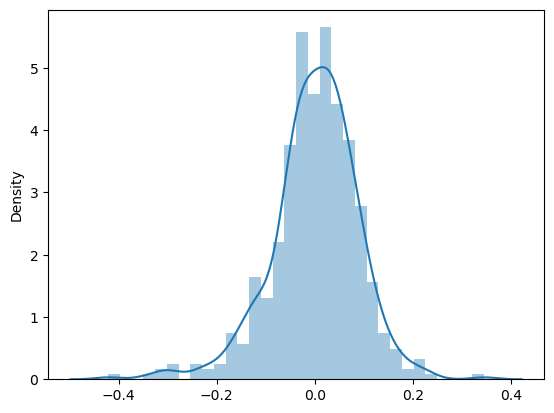

In [848]:
#Plotting a graph to check the normality of errors
sns.distplot(res)
plt.show()

In [849]:
#It is observed that error terms are normally distributed

# MULTICOLINEARITY

In [850]:
#Checking for multicolinearity (assumptions of Linear Regression)
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.23
4,humidity,1.87
14,winter,1.71
3,temp,1.59
12,Mist,1.56
8,10,1.48
6,8,1.46
13,summer,1.38
11,Lightsnow_lightrain,1.25
7,9,1.24


The VIF values of all the independent variables are less than 5,hence there does not seem to be any multicollinearity

# LINEARITY

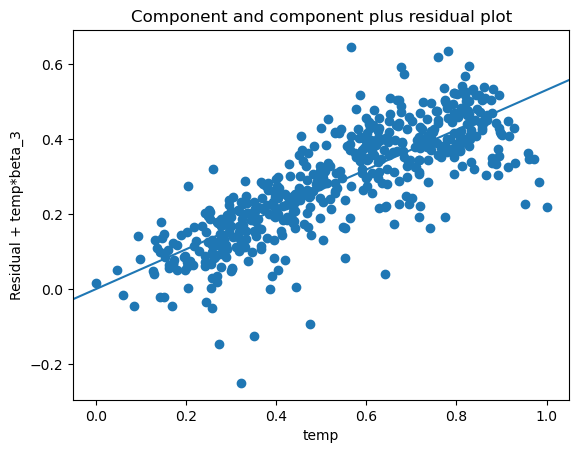

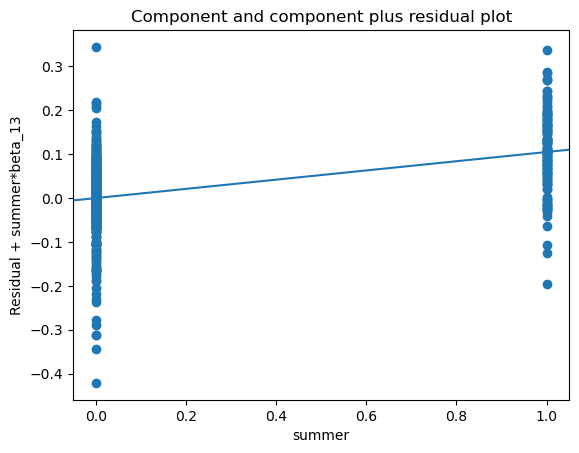

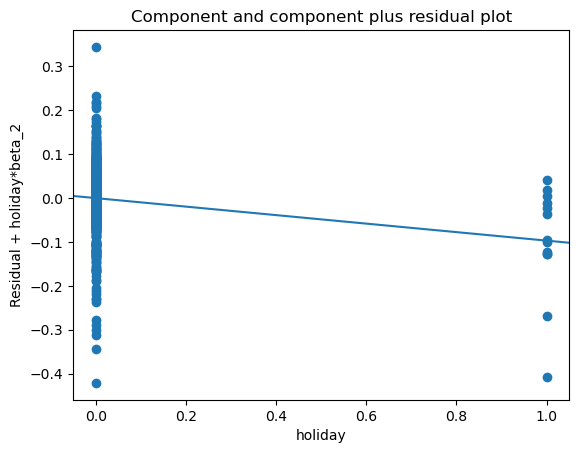

In [851]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr12, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr12, 'summer')
plt.show()

sm.graphics.plot_ccpr(lr12, 'holiday')
plt.show()

Linearity can be observed from above visualizations.

# HOMOSCEDASTICITY

Checking heteroscedasticity :Using Goldfeld Quandt we test for heteroscedasticity.
1. Null Hypothesis:Error terms are homoscedastic
2. Alternative hypothesis:Error terms are heteroscedastic

According to this test,the p-value should be less that 0.05 to be able to reject the null hypothesis

In [852]:
#importing all the necessary libraries
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name=['F statistic','p-value']
test=sms.het_goldfeldquandt(res, X_train)
lzip(name,test)

[('F statistic', 1.0285905937420048), ('p-value', 0.41618893184332156)]

Here, the p-value is more than 0.05 hence,we will not be able to reject the null hypothesis . Hence the assumption of HOMOSCEDASTICITY is validated

# INDEPENDENCE

Independence of residuals
Durbin-Watson value of final model lr12 is 2.027, which signifies there is no autocorrelation.

# Predictions and evaluations on test set

In [853]:
#Pre-processing
numeric_vars = ['temp','atemp','humidity','windspeed','cnt']
df_test[numeric_vars] = scaling.transform(df_test[numeric_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,2,3,...,sat,sun,thu,tue,wed,Lightsnow_lightrain,Mist,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [854]:
#Looking at some statistical data for the test dataset
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,2,3,...,sat,sun,thu,tue,wed,Lightsnow_lightrain,Mist,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.100000,0.054545,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.300684,0.227609,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [855]:
#Creating y-test and x test
y_test = df_test.pop('cnt')
X_test = df_test

In [856]:
#adding a constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,year,holiday,workingday,temp,atemp,humidity,windspeed,2,3,...,sat,sun,thu,tue,wed,Lightsnow_lightrain,Mist,spring,summer,winter
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,...,0,0,1,0,0,0,0,0,1,0
299,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,...,1,0,0,0,0,0,1,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,0,0,...,1,0,0,0,0,0,0,0,1,0


In [857]:
X_test_sm=X_test_sm.drop(['atemp',11,12,'thu','wed','workingday','spring',7,2,4,'sat','sun',3,6,5],axis=1)

In [858]:
#predictions
y_test_pred=lr12.predict(X_test_sm)
y_test_pred

184    0.401949
535    0.920608
299    0.424710
221    0.629695
152    0.629469
         ...   
702    0.699577
127    0.504370
640    0.832279
72     0.292241
653    0.759746
Length: 220, dtype: float64

In [859]:
#evaluation of model
r2 = r2_score(y_test, y_test_pred)
round(r2,3)

0.815

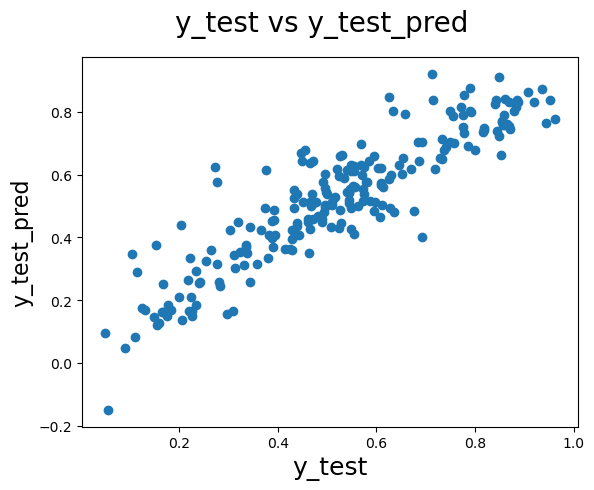

In [860]:
#Looking at the relationship between ytest and ypred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

In [861]:
#Looking at the coeffecients of our model to see the equation  of the best fit line
round(lr12.params,4)

const                  0.2430
year                   0.2289
holiday               -0.0969
temp                   0.5311
humidity              -0.1757
windspeed             -0.1814
8                      0.0568
9                      0.1266
10                     0.0365
mon                   -0.0272
tue                   -0.0273
Lightsnow_lightrain   -0.2429
Mist                  -0.0551
summer                 0.1051
winter                 0.1362
dtype: float64

The equation of best fitted line is: 0.22* year + (-0.96)* holiday + 0.53* temp +(-0.17)* humidity + (-0.18)* windspeed+ 0.05* August + 0.12* September +0.03* October+(-0.02)* Monday +(-0.02)* Tuesday +(-0.24)* Lightsnow+(-0.05)* Mist + 0.10* Summer +0.13* Winter

In [862]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),3)
print(adjusted_r2)


0.787


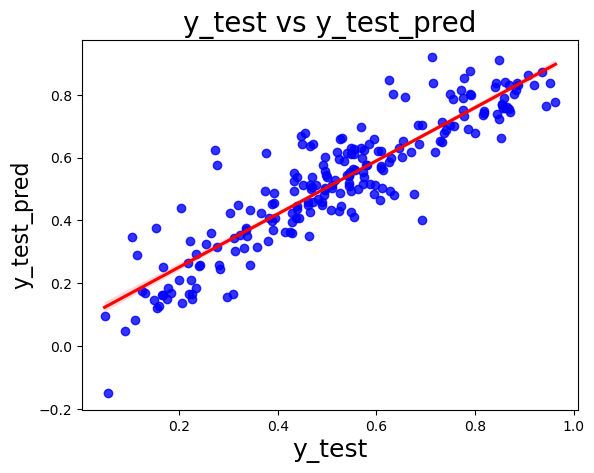

In [863]:
#Looking at the regression plot for ytest and y pred
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.845
- Test dataset R^2           : 0.814
- Train dataset Adjusted R^2 : 0.841    
- Test dataset Adjusted R^2  : 0.787